In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

2022-01-25 00:37:11.085051: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/navneeth/ros2_ws/install/my_robot_interfaces/lib:/usr/lib/x86_64-linux-gnu/gazebo-11/plugins:/opt/ros/foxy/opt/yaml_cpp_vendor/lib:/opt/ros/foxy/opt/rviz_ogre_vendor/lib:/opt/ros/foxy/lib/x86_64-linux-gnu:/opt/ros/foxy/lib
2022-01-25 00:37:11.085075: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(X_train,y_train) , (X_test ,y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

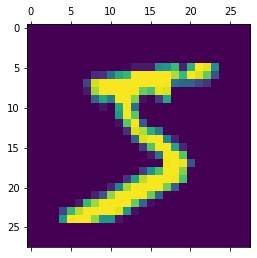

In [4]:
plt.matshow(X_train[0])

In [5]:
y_train[2]

4

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)



In [9]:
print(X_train_flattened.shape)
print(X_test_flattened.shape)

(60000, 784)
(10000, 784)


In [10]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [11]:
model = keras.Sequential([
          keras.layers.Dense(10 , input_shape = (784,),activation='sigmoid')

])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=5)

2022-01-25 00:37:15.595437: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/navneeth/ros2_ws/install/my_robot_interfaces/lib:/usr/lib/x86_64-linux-gnu/gazebo-11/plugins:/opt/ros/foxy/opt/yaml_cpp_vendor/lib:/opt/ros/foxy/opt/rviz_ogre_vendor/lib:/opt/ros/foxy/lib/x86_64-linux-gnu:/opt/ros/foxy/lib
2022-01-25 00:37:15.595483: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-25 00:37:15.595519: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (navneeth-ThinkPad-E14): /proc/driver/nvidia/version does not exist
2022-01-25 00:37:15.595890: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instr

Epoch 1/5
1875/1875 [==============================] - 2s 864us/step - loss: 0.4654 - accuracy: 0.8773
Epoch 2/5
1875/1875 [==============================] - 2s 842us/step - loss: 0.3036 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 2s 804us/step - loss: 0.2833 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 2s 803us/step - loss: 0.2732 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 2s 809us/step - loss: 0.2664 - accuracy: 0.9257


In [12]:
model.evaluate(X_test_flattened,y_test)

 82/313 [======>.......................] - ETA: 0s - loss: 0.3419 - accuracy: 0.9032 

2022-01-25 00:37:24.171387: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 0s 661us/step - loss: 0.2651 - accuracy: 0.9272


[0.26507359743118286, 0.9272000193595886]

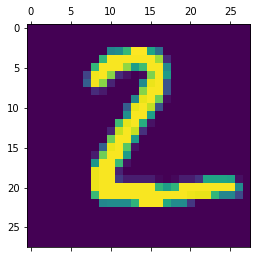

In [13]:
plt.matshow(X_test[1])

In [14]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

2022-01-25 00:37:24.699075: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


array([4.1238403e-01, 7.3850453e-03, 9.9953961e-01, 4.0867242e-01,
       7.0067052e-10, 8.8090092e-01, 8.7684774e-01, 6.7696532e-13,
       1.4951199e-01, 1.9781359e-09], dtype=float32)

In [15]:
np.argmax(y_predicted[1])

2

In [16]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [17]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [18]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    0,    2,    0,    5,    9,    2,    1,    1],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   4,    9,  932,   12,    8,    6,   12,    9,   36,    4],
       [   3,    1,   24,  904,    0,   38,    2,   10,   17,   11],
       [   1,    2,    5,    1,  918,    0,    9,    3,    5,   38],
       [   8,    2,    3,   18,    8,  802,   12,    4,   28,    7],
       [   8,    3,    6,    1,    7,   19,  910,    2,    2,    0],
       [   1,    8,   23,    6,    9,    1,    0,  938,    1,   41],
       [   7,   11,    7,   19,    9,   31,    8,   10,  859,   13],
       [  11,    7,    1,    9,   25,    7,    0,   13,    5,  931]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

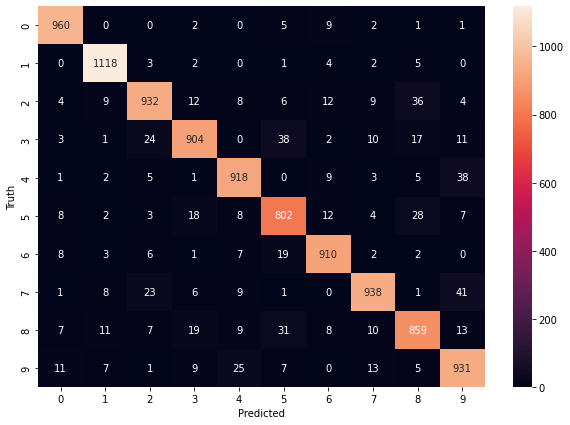

In [19]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [20]:
model = keras.Sequential([
          keras.layers.Dense(100 , input_shape = (784,),activation='relu'),
          keras.layers.Dense(10 , activation='sigmoid')

])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=5)

2022-01-25 00:37:29.076350: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2773 - accuracy: 0.9220
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1269 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0891 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0668 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0528 - accuracy: 0.9841


In [21]:
model.evaluate(X_test_flattened,y_test)

 55/313 [====>.........................] - ETA: 0s - loss: 0.1028 - accuracy: 0.9653 

2022-01-25 00:37:40.349865: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 0s 807us/step - loss: 0.0831 - accuracy: 0.9730


[0.08311601728200912, 0.9729999899864197]